In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm

# 超参数
INPUT_SIZE = 3 * 32 * 32
OUTPUT_SIZE = 10
BATCH_SIZE = 4
EPOCH_NUM = 2

transform = transforms.Compose(
    [transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]  # 逐通道对图像标准化
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()

        self.fc1 = nn.Linear(INPUT_SIZE, OUTPUT_SIZE)

    def forward(self, x):
        x = x.view(-1, INPUT_SIZE)
        x = self.fc1(x)
        x = F.relu(x)

        return x
net = SimpleNet()
print(net)

SimpleNet(
  (fc1): Linear(in_features=3072, out_features=10, bias=True)
)


In [3]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)

In [4]:
train_loss_hist = []
test_loss_hist = []

for epoch in tqdm(range(EPOCH_NUM)):
    # 训练 ？？？？
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        images, labels = data
        outputs = net(images)

        loss = criterion(outputs, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if(i % 250 == 0):
            correct = 0.0
            total = 0.0

            net.eval()
            with torch.no_grad():
                for test_data in testloader:
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
            
            train_loss_hist.append(running_loss / 250)
            test_loss_hist.append(test_loss.item())
            running_loss = 0.0

        # if(i % 1000 == 0):
        #     print('Epoch: %d, Step: %d, Loss: %.3f' %(epoch, i, loss.item()))

100%|██████████| 2/2 [07:47<00:00, 233.83s/it]


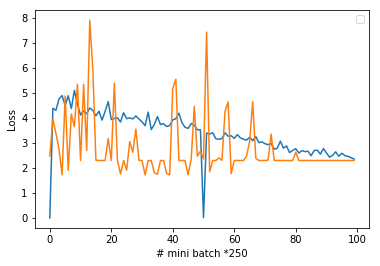

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss_hist)
plt.plot(test_loss_hist)
plt.legend('train_loss', 'test_loss')
plt.xlabel('# mini batch *250')
plt.ylabel('Loss')

In [7]:
# 测试模型

correct = 0.0
total = 0.0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        correct += (predicted == labels).sum()
        total += labels.size(0)
    
print('准确率：', float(correct) / total)

准确率： 0.1293


In [ ]:
# 准确率： 0.1293